In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

# 1 - REGRESSION

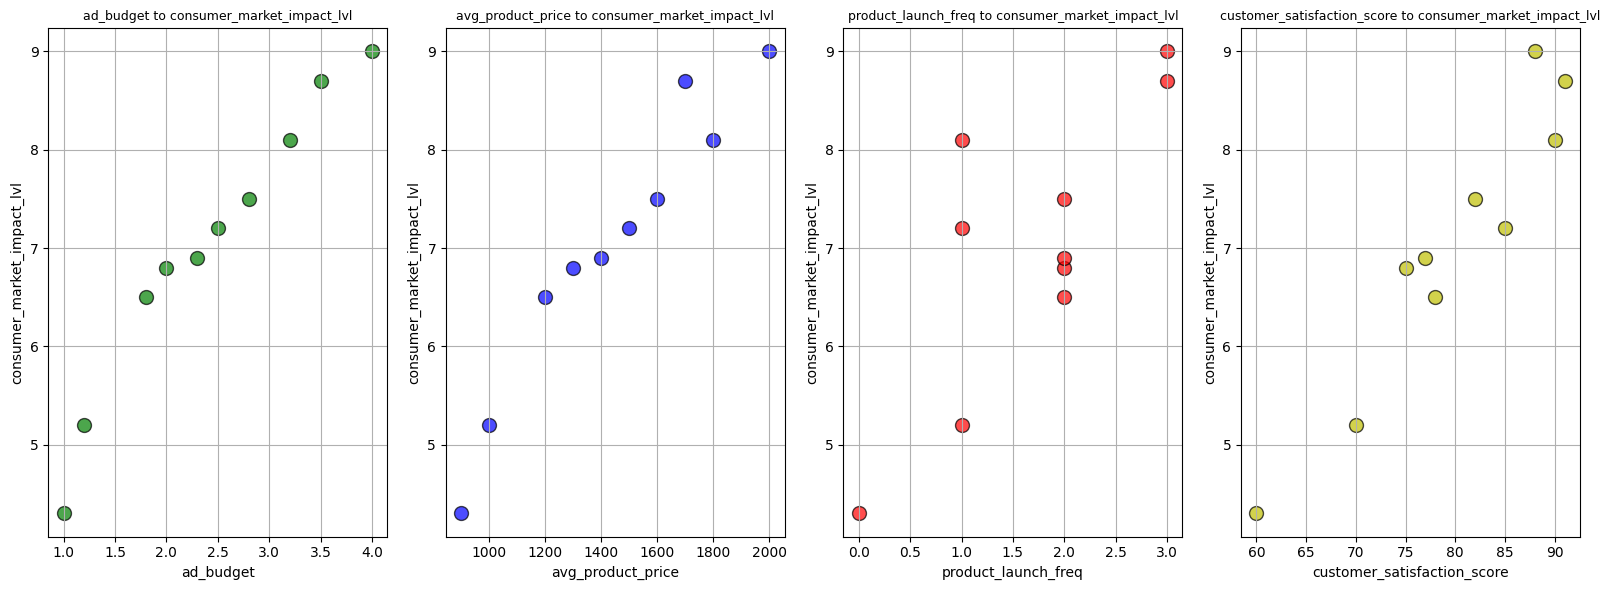

In [137]:
# Data + user request
avg_product_price = [1500, 1200, 1800, 900, 1300, 2000, 1600, 1000, 1400, 1700]
ad_budget = [2.5, 1.8, 3.2, 1.0, 2.0, 4.0, 2.8, 1.2, 2.3, 3.5]
product_launch_freq = [1, 2, 1, 0, 2, 3, 2, 1, 2, 3]
customer_satisfaction_score = [85, 78, 90, 60, 75, 88, 82, 70, 77, 91]
consumer_market_impact_lvl = [7.2, 6.5, 8.1, 4.3, 6.8, 9.0, 7.5, 5.2, 6.9, 8.7]
# Create figure and axes for Size-Price plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6))
font_title = 9
ax1.scatter(ad_budget, consumer_market_impact_lvl, color='g', s=100,
edgecolors='black', alpha=0.7)
ax1.set_xlabel('ad_budget')
ax1.set_ylabel('consumer_market_impact_lvl')
ax1.set_title('ad_budget to consumer_market_impact_lvl', fontsize=font_title)
ax1.grid(True)
ax2.scatter(avg_product_price, consumer_market_impact_lvl, color='b', s=100,
edgecolors='black', alpha=0.7)
ax2.set_xlabel('avg_product_price')
ax2.set_ylabel('consumer_market_impact_lvl')
ax2.set_title('avg_product_price to consumer_market_impact_lvl',
fontsize=font_title)
ax2.grid(True)
ax3.scatter(product_launch_freq, consumer_market_impact_lvl, color='r', s=100,
edgecolors='black', alpha=0.7)
ax3.set_xlabel('product_launch_freq')
ax3.set_ylabel('consumer_market_impact_lvl')
ax3.set_title('product_launch_freq to consumer_market_impact_lvl',
fontsize=font_title)
ax3.grid(True)
ax4.scatter(customer_satisfaction_score, consumer_market_impact_lvl, color='y',
s=100, edgecolors='black', alpha=0.7)
ax4.set_xlabel('customer_satisfaction_score')
ax4.set_ylabel('consumer_market_impact_lvl')
ax4.set_title('customer_satisfaction_score to consumer_market_impact_lvl',
fontsize=font_title)
ax4.grid(True)
plt.tight_layout()
plt.show()
# *** Your code ***
#################################
# Create DataFrame ...
# Data transformation ...
# Train-test-sampling ...
# Model initialization ...
# Model fitting and evaluation metrics ...
# Prediction ...

# 1.1 Regression Model

In [138]:
data = {
    'Avg': avg_product_price,
    'Ad': ad_budget,
    'Product': product_launch_freq,
    'Customer': customer_satisfaction_score,
    'Consumer': consumer_market_impact_lvl
}
df = pd.DataFrame(data)
print("Dataset:")
print(df)
print()

Dataset:
    Avg   Ad  Product  Customer  Consumer
0  1500  2.5        1        85       7.2
1  1200  1.8        2        78       6.5
2  1800  3.2        1        90       8.1
3   900  1.0        0        60       4.3
4  1300  2.0        2        75       6.8
5  2000  4.0        3        88       9.0
6  1600  2.8        2        82       7.5
7  1000  1.2        1        70       5.2
8  1400  2.3        2        77       6.9
9  1700  3.5        3        91       8.7



In [163]:
X = df.drop('Consumer', axis=1)
y = df['Consumer']


In [181]:
sc = StandardScaler()
Xs = sc.fit_transform(X)
params = {'alpha':[0.001]}
grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(Xs, y)
print('best alpha', grid.best_params_)

best alpha {'alpha': 0.001}


In [182]:
best_model = grid.best_estimator_
y_pred = best_model.predict(Xs)
print('R2:', r2_score(y, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))
print('MAE:', mean_absolute_error(y, y_pred))

R2: 0.9953537240844373
RMSE: 0.0944895962492445
MAE: 0.06916470461787476


# 1.2 Prediction

In [183]:
new = pd.DataFrame({
    'Avg': [900],
    'Ad': [0.5],
    'Product': [6],
    'Customer': [90]
})

news = sc.transform(new)
pred = best_model.predict(news)
print(f"Prediction: {pred[0]} ฿")

Prediction: 7.882595864111364 ฿


# 2 - CLASSIFICATION

In [3]:
df = pd.read_csv('wind_turbine_dataset.csv')
df.dropna(inplace=True) # Drop rows with NaN

df.describe()

,wind_speed,motor_temperature,blade_angle,vibration_level,humidity,air_pressure,energy_output
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,14.994554,50.003476,22.442093,5.001926,55.180697,999.932358,455.063986
std,5.759535,17.316536,12.986759,2.889575,20.186245,57.792561,90.449384
min,5.000111,20.000506,0.001321,0.000275,20.000335,900.007917,400.000000
25%,10.018965,35.054000,11.115803,2.486751,37.717813,949.759227,400.000000
50%,15.010346,50.038590,22.546399,5.002171,55.248569,999.888106,400.000000
75%,19.956525,65.084608,33.717585,7.504795,72.552454,1049.901557,489.888544
max,24.998497,79.998329,44.999642,9.999213,89.999257,1099.995555,905.127803


# 2.1 Classification Model

In [4]:
def get_range(energy_output):
    if 0 <= energy_output < 500:
            return 0
    elif 500 <= energy_output < 600:
        return 1
    elif 600 <= energy_output:
        return 2

df['energy_output'] = df['energy_output'].apply(get_range)

X = df.drop(['energy_output', 'turbine_status'], axis=1)[:-1]
y = df['energy_output'][:-1]
X

,wind_speed,motor_temperature,blade_angle,vibration_level,humidity,air_pressure
0,12.490802,56.563558,1.919750,8.618620,28.982391,963.680636
1,24.014286,22.334208,37.282708,7.893506,74.230604,1057.022743
2,19.639879,56.735620,11.218841,2.810425,63.106870,995.511060
3,16.973170,25.380116,12.777181,4.197177,65.321011,1032.785998
4,8.120373,62.620654,10.181038,5.076866,37.200880,934.721246
...,...,...,...,...,...,...
34994,10.043079,33.863674,39.368506,6.485564,36.172975,1062.583759
34995,13.688071,55.663792,14.238366,7.877179,53.960014,1073.243533
34996,14.271533,76.796947,8.328146,1.801420,79.767302,1093.872967
34997,15.593338,75.255110,26.618267,5.302510,51.949326,1048.203685


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
params = {
    'n_estimators': [260, 270],
    'max_depth': [2, 3],
    'learning_rate': [0.11, 0.115]
}
xgbc = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='multi:softmax', num_class=3)
grid = GridSearchCV(xgbc, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print('Best params:', grid.best_params_)

c:\Users\Tanaphat\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:18:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 260}


In [11]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.891
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5362
           1       0.60      0.54      0.57       909
           2       0.82      0.76      0.79       729

    accuracy                           0.89      7000
   macro avg       0.79      0.76      0.77      7000
weighted avg       0.89      0.89      0.89      7000

Confusion matrix:
[[5190  169    3]
 [ 297  493  119]
 [   9  166  554]]


# 2.2 Prediction 1

In [25]:
new = pd.DataFrame({
    'wind_speed': [23.093836],
    'motor_temperature': [25.951137],
    'blade_angle': [14.852710],
    'vibration_level': [5.033187],
    'humidity': [85.185910],
    'air_pressure': [1020.801544]
})

new_scaled = scaler.transform(new)
pred = best_model.predict(new_scaled)
print(f"Predicted: {pred[0]}")

# CLASS
# 0 = 0 - 500
# 1 = 500 - 600
# 2 = >= 600 เปิดใช้งาน

Predicted: 2


# 2.2 Prediction 2

In [26]:
new = pd.DataFrame({
    'wind_speed': [0],
    'motor_temperature': [25.951137],
    'blade_angle': [14.852710],
    'vibration_level': [5.033187],
    'humidity': [85.185910],
    'air_pressure': [1020.801544]
})

new_scaled = scaler.transform(new)
pred = best_model.predict(new_scaled)
print(f"Predicted: {pred[0]}")

# CLASS
# 0 = 0 - 500
# 1 = 500 - 600
# 2 = >= 600 เปิดใช้งาน

Predicted: 0
